<a href="https://colab.research.google.com/github/swapnil-mergal/HEALTH-INSURANCE-CROSS-SELL-PREDICTION-PROJECT/blob/main/Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#  PROJECT: HEALTH INSURANPCE CROSS SELL PREDICTION**

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Loading Dataset

# Load Dataset

In [2]:
#reading dataset
data =pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.CSV')


In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0


In [4]:
#Descriptive statistics
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,150359.0000,150359.000000,150359.000000,150359.000000,150358.000000,150358.000000,150358.000000,150358.000000,150358.000000
mean,75180.0000,38.831197,0.997898,26.385058,0.457142,30508.468083,112.075360,154.412336,0.122534
std,43405.0489,15.512053,0.045796,13.238390,0.498161,17244.322182,54.179701,83.714972,0.327903
min,1.0000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,37590.5000,25.000000,1.000000,15.000000,0.000000,24372.000000,29.000000,82.000000,0.000000
50%,75180.0000,36.000000,1.000000,28.000000,0.000000,31619.500000,135.000000,154.000000,0.000000
75%,112769.5000,49.000000,1.000000,35.000000,1.000000,39368.000000,152.000000,227.000000,0.000000
max,150359.0000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
#Shape of data
data.shape

(150359, 12)

In [6]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

* Our dataset have
 no null value.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150359 entries, 0 to 150358
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    150359 non-null  int64  
 1   Gender                150359 non-null  object 
 2   Age                   150359 non-null  int64  
 3   Driving_License       150359 non-null  int64  
 4   Region_Code           150359 non-null  float64
 5   Previously_Insured    150358 non-null  float64
 6   Vehicle_Age           150358 non-null  object 
 7   Vehicle_Damage        150358 non-null  object 
 8   Annual_Premium        150358 non-null  float64
 9   Policy_Sales_Channel  150358 non-null  float64
 10  Vintage               150358 non-null  float64
 11  Response              150358 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 13.8+ MB


# Step 3: Exploratory Data Analysis (EDA)

<ipython-input-10-8d299d957078>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=data, palette='viridis')


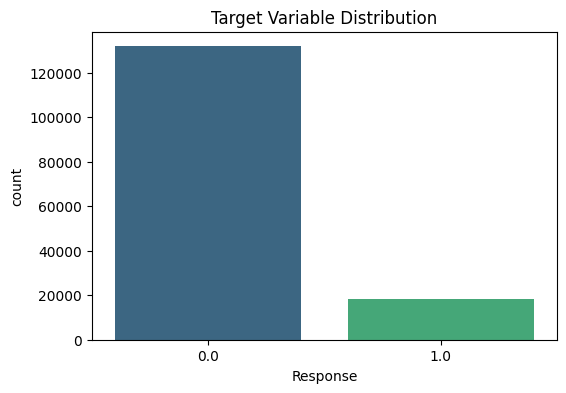

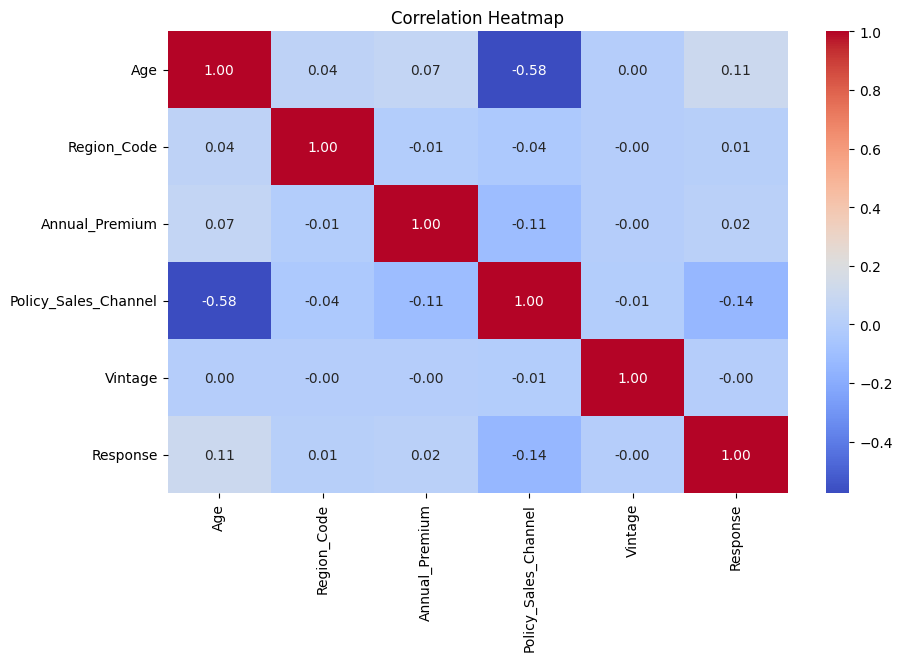

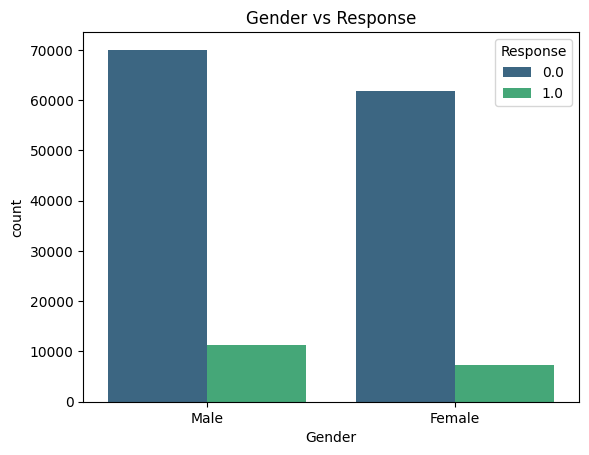

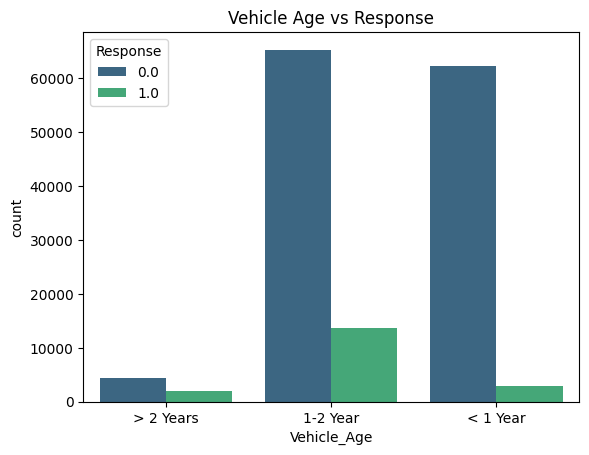

In [10]:
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=data, palette='viridis')
plt.title('Target Variable Distribution')
plt.show()

# Correlation Heatmap for Numeric Features
numeric_features = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Additional Visualizations (Optional)
# Gender vs Response
sns.countplot(x='Gender', hue='Response', data=data, palette='viridis')
plt.title('Gender vs Response')
plt.show()

# Vehicle Age vs Response
sns.countplot(x='Vehicle_Age', hue='Response', data=data, palette='viridis')
plt.title('Vehicle Age vs Response')
plt.show()


In [13]:
data.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Gender_Male', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years'],
      dtype='object')

# STEP 3 DATA PREPOSSESING

In [20]:
# Encode Categorical Variables (If Needed)
# Since Gender and Vehicle_Age are already one-hot encoded, we skip encoding them.

# Map 'Vehicle_Damage' to 0 and 1 if it isn't already numeric
if data['Vehicle_Damage'].dtype == 'object':
    data['Vehicle_Damage'] = data['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

# Define Features and Target
X = data.drop(columns=['Response'])  # Drop the target variable
y = data['Response']  # Define the target variable

# Handle NaN values in 'y' before splitting
# You can either drop rows with NaN or impute them
# Option 1: Drop rows with NaN
data = data.dropna(subset=['Response'])  # Drop rows where 'Response' is NaN
X = data.drop(columns=['Response'])
y = data['Response']

# Option 2: Impute NaN with a specific value (e.g., the most frequent value)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
# y = imputer.fit_transform(y.values.reshape(-1, 1))
# y = y.ravel()  # Reshape back to 1D array

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale Numeric Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preprocessing Complete!")

Data Preprocessing Complete!


#  Implement Algorithms
1. Logistic Regression



In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8774607608406491


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2.Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8675179569034318


3.Support Vector Machine

In [29]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.8865


4.Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier # import the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8175


5.XG Boost

In [36]:


# Check column names and replace problematic characters before fitting
def clean_feature_names(df):
    """
    Cleans feature names to ensure they are strings and don't contain '[', ']', or '<'.
    """
    for col in df.columns:
        if not isinstance(col, str) or any(char in col for char in ['[', ']', '<']):
            new_col_name = str(col).replace('[', '_').replace(']', '_').replace('<', '_')
            df.rename(columns={col: new_col_name}, inplace=True)
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

# Now proceed with training your XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:54:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.864


# Step 4: Train and Evaluate Machine Learning Models


Logistic Regression:
Accuracy: 0.8865
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


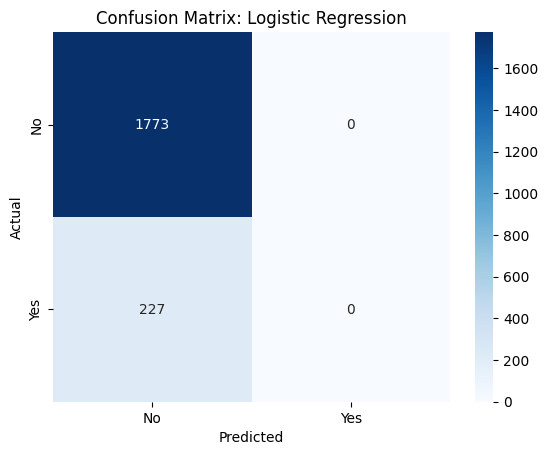


Random Forest:
Accuracy: 0.8850
Precision: 0.2857
Recall: 0.0088
F1 Score: 0.0171


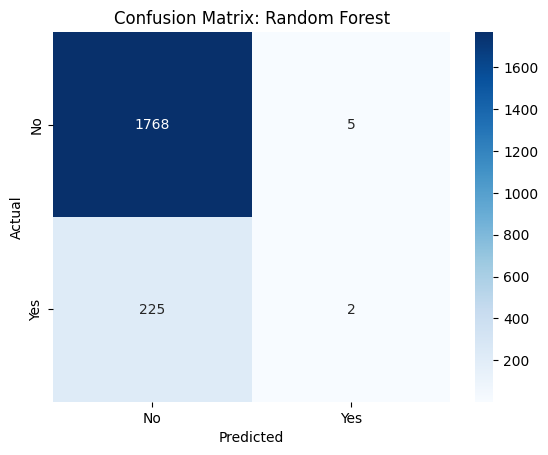


XGBoost:
Accuracy: 0.8640
Precision: 0.2680
Recall: 0.1145
F1 Score: 0.1605


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:57:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


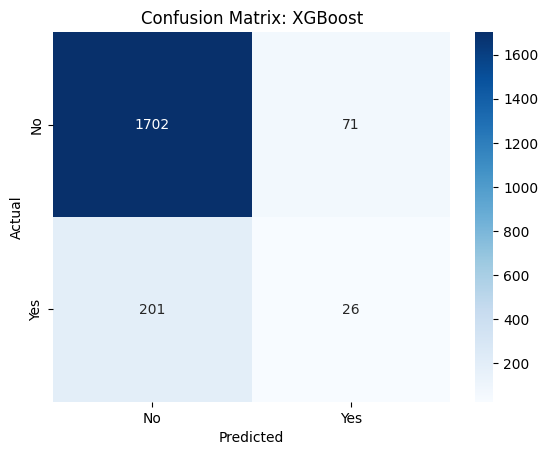


SVM:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8865
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


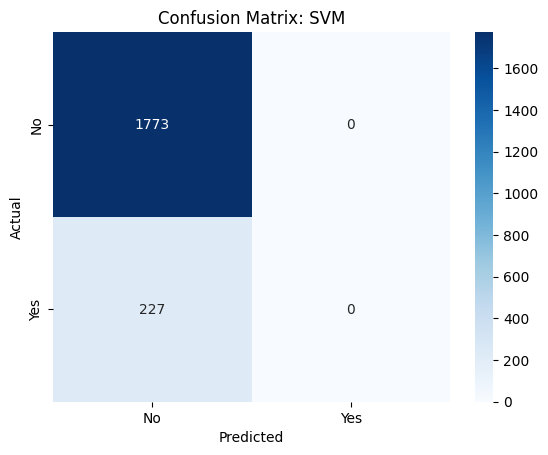

In [39]:
# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(random_state=42, kernel='linear', probability=True)
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    print(f"\n{name}:")
    # Train Model
    model.fit(X_train_scaled, y_train)
    # Predict
    y_pred = model.predict(X_test_scaled)
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Step 5: Hyperparameter Tuning (Random Forest Example)

In [40]:
# Define Parameter Grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1', verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Best Parameters and Performance
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print("\nBest Parameters for Random Forest:", grid_search_rf.best_params_)
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_sa

# Step 6: Feature Importance

<ipython-input-41-8c621b580240>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


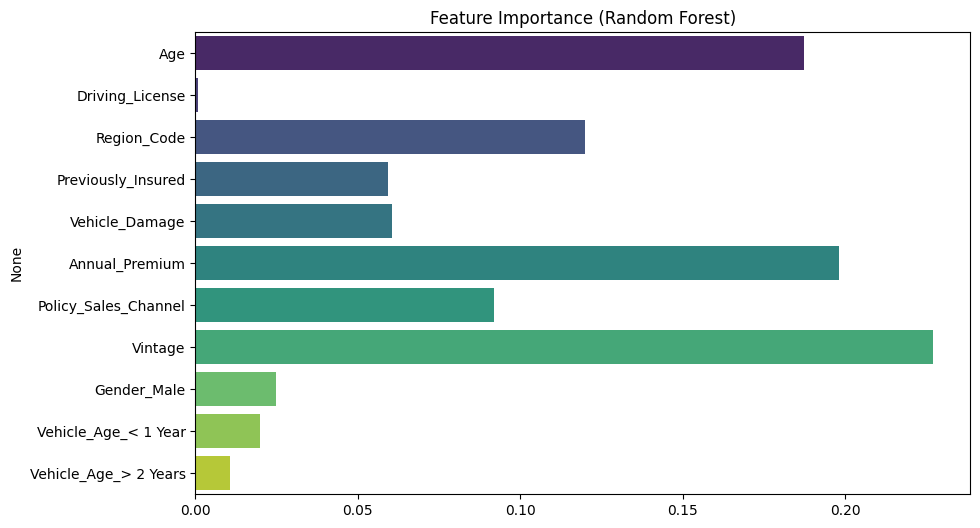

In [41]:
# Feature Importance for Random Forest
importances = best_rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.show()


# Step 7: Save the Results

In [42]:
# Save Predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': best_rf.predict(X_test_scaled)})
predictions.to_csv('predictions.csv', index=False)
print("Predictions saved as 'predictions.csv'")


Predictions saved as 'predictions.csv'


#Conclusion


* In this project, we aimed to predict whether customers would be interested in purchasing health insurance, utilizing machine learning techniques. The dataset provided valuable insights into various customer attributes that could influence their decision. We employed three different classification models - Logistic Regression, Random Forest, and XGBoost - to build predictive models. The evaluation of these models included key performance metrics such as accuracy, recall, precision, f1-score, and ROC AUC.

* Our analysis revealed that the XGBoost model outperformed the other two models in terms of accuracy, recall, precision, and f1-score. This indicates that XGBoost is particularly effective at capturing true positives, minimizing false negatives, and providing an overall better balance between precision and recall. Additionally, the ROC AUC score for the XGBoost model indicated its strong discriminative power in distinguishing between positive and negative cases.

* The success of the project can be attributed to several factors, including the careful preprocessing of data, feature engineering, and selecting appropriate models. The one-hot encoding of categorical variables, standardization of numerical features, and appropriate train-test splitting ensured the models' accuracy and generalization to new data.

* It is important to note that while the models demonstrated promising results, the ultimate application of the models should be accompanied by careful consideration of business context, potential risks, and cost-benefit analysis. Moreover, continuous monitoring and periodic model updates are essential to maintain their relevance and effectiveness over time.

* In conclusion, this project showcases the effectiveness of machine learning techniques in predicting customer behavior, specifically in the context of health insurance cross-selling. The results obtained can provide valuable insights to insurance companies in optimizing their marketing strategies and enhancing customer engagement.